# Building and Testing Recommender Systems With Surprise

Collaborative filtering models try to find similarities between items / users through commonly rated /owned items. 
Example: user enjoys Caverna, from our analysis of the population we know that those users who enjoy Caverna AND know about Feast for Odin tend to enjoy the second game too, so we recommend FfO to the user.

## Model based Collaborative filtering

* we will focus on the collaborative filtering approach, that is: the user is recommended items that people with similar tastes and preferences liked in the past. In another word, this method predicts unknown ratings by using the similarities between users.

https://towardsdatascience.com/building-and-testing-recommender-systems-with-surprise-step-by-step-d4ba702ef80b

https://towardsdatascience.com/how-to-build-a-memory-based-recommendation-system-using-python-surprise-55f3257b2cf4

https://towardsdatascience.com/various-implementations-of-collaborative-filtering-100385c6dfe0

In [1]:
# Find the directory of the dataset
import os 
os.getcwd()

'/Users/yangxiang/A List/Uchicago/2020_Spring/Machine_Learning/Project/Submission/Model'

In [2]:
# Install package in RCC
pip install --user plotly

SyntaxError: invalid syntax (<ipython-input-2-4db8bb200109>, line 2)

In [2]:
import pandas as pd
import plotly
import pandas as pd
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import NormalPredictor
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNWithZScore
from surprise import KNNBaseline
from surprise import SVD
from surprise import BaselineOnly
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from surprise.accuracy import rmse
from surprise import accuracy
from surprise.model_selection import train_test_split

In [3]:
# Import Data
df=pd.read_csv('/home/yangxiang/ML_Project/Clean_Data/rest_lv_reviews.csv')

FileNotFoundError: [Errno 2] File b'/home/yangxiang/ML_Project/Clean_Data/rest_lv_reviews.csv' does not exist: b'/home/yangxiang/ML_Project/Clean_Data/rest_lv_reviews.csv'

In [4]:
# Take only 'user_id','business_id','rating'
df=df[['user_id','business_id','rating']]

In [5]:
#df=df.rename(columns={"user_id": "userID", "business_id": "ISBN","rating":"bookRating"})

In [6]:
df.head()

user_id             business_id  rating
0  2hRe26HSCAWbFRn5WChK-Q  d4qwVw4PcN-_2mK2o1Ro1g     1.0
1  RR-2nouBn408e3djxC470g  d4qwVw4PcN-_2mK2o1Ro1g     5.0
2  3I806vywudUaWV6yVGHE2w  d4qwVw4PcN-_2mK2o1Ro1g     4.0
3  yPM0X8nANqXUUrcZHVQSZQ  d4qwVw4PcN-_2mK2o1Ro1g     2.0
4  Zfj1fLiPeqAtjQVJRTfpZQ  d4qwVw4PcN-_2mK2o1Ro1g     2.0

### EDA



In [7]:
# #Ratings Distribution
# import matplotlib
# import matplotlib.pyplot as plt
# bins = [0,1,2,3,4,5,6]
# plt.hist(df['rating'], bins, histtype='bar', rwidth=0.8)
# plt.xlabel('rating')
# plt.ylabel('count')
# plt.title('Ratings Distribution')
# plt.show

In [9]:

from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

data = df['rating'].value_counts().sort_index(ascending=False)
trace = go.Bar(x = data.index,
               text = ['{:.1f} %'.format(val) for val in (data.values / df.shape[0] * 100)],
               textposition = 'auto',
               textfont = dict(color = '#000000'),
               y = data.values,
               )
# Create layout
layout = dict(title = 'Distribution Of {} LV Restaurant ratings'.format(df.shape[0]),
              xaxis = dict(title = 'Rating'),
              yaxis = dict(title = 'Count'))
# Create plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

In [9]:
# We can see that majority of the ratings in the data are 5

#### Check the distribution of rating by business



In [17]:
# Number of ratings per business
data = df.groupby('business_id')['rating'].count().clip(upper=500)

# Create trace
trace = go.Histogram(x = data.values,
                     name = 'Ratings',
                     xbins = dict(start = 0,
                                  end = 500,
                                  size = 1))
# Create layout
layout = go.Layout(title = 'Distribution Of Number of Ratings Per LV Restaurant (Clipped at 500)',
                   xaxis = dict(title = 'Number of Ratings Per business'),
                   yaxis = dict(title = 'Count'),
                   bargap = 0.2)

# Create plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

In [18]:
df.groupby('business_id')['rating'].count().reset_index().sort_values('rating', ascending=False)[:10]

business_id  rating
2174  RESDUcs7fIiihp38-d6_6g   10417
1609  K7lWdNUhCbcnEvI0NhGewg    7594
3331  f4x1YBxkLrZg652xt2KR5g    6859
3143  cYwJA2A6I12KNkm2rtXd5g    5586
465   5LNZ67Yw9RD6nf4_UhXOjw    4973
293   2weQS-RnoOBhb1KsHKyoSQ    4953
3581  iCQpiavjjPzJ5_3gPD5Ebg    4882
850   AV6weBrZFFBfRGCbcRGO4g    4819
4508  ujHiaprwCQ5ewziu0Vi9rw    4731
1188  El4FC8jcawUVgw_0EIcbaQ    4589

In [13]:
# The majority of the business have less than 200 rating

#### Check the distribution of rating by user



In [19]:
# Number of ratings per user
data = df.groupby('user_id')['rating'].count().clip(upper=50)

# Create trace
trace = go.Histogram(x = data.values,
                     name = 'Ratings',
                     xbins = dict(start = 0,
                                  end = 50,
                                  size = 2))
# Create layout
layout = go.Layout(title = 'Distribution Of Number of Ratings Per User (Clipped at 50)',
                   xaxis = dict(title = 'Ratings Per User'),
                   yaxis = dict(title = 'Count'),
                   bargap = 0.2)

# Create plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

In [20]:
df.groupby('user_id')['rating'].count().reset_index().sort_values('rating', ascending=False)[:10]

user_id  rating
278016  bLbSNkLggFnqwNNzzq-Ijw    1120
186081  PKEzKWv_FktMm2mGPjwd0Q     800
219796  U4INQZOPSUaj8hMjLlZ3KA     763
223180  UYcmGbelzRa0Q6JqzLoguw     531
361065  n86B7IkbU20AkxlFX_5aew     492
33633   3nDUQBjKyVor5wV0reJChg     474
156436  L8P5OWO1Jh4B2HLa1Fnbng     463
92353   C2C0GPKvzWWnP57Os9eQ0w     410
385841  qewG3X2O4X6JKskxyyqFwQ     381
65112   8DEyKVyplnOcSKx39vatbg     368

In [21]:
# Most of the users in the data gave less than 3 ratings reviews
#the most productive user have given 1120 ratings.
#The number of ratings per book and the number of ratings per user decay exponentially.

In [22]:
# To reduce the dimensionality of the data set, 
#and avoid running into “memory error”, we will filter out 
#rarely rated restuarant and rarely rating users.

min_business_ratings = 50
filter_business = df['business_id'].value_counts() > min_business_ratings
filter_business = filter_business[filter_business].index.tolist()

min_user_ratings = 50
filter_users = df['user_id'].value_counts() > min_user_ratings
filter_users = filter_users[filter_users].index.tolist()

df_new = df[(df['business_id'].isin(filter_business)) & (df['user_id'].isin(filter_users))]
print('The original data frame shape:\t{}'.format(df.shape))
print('The new data frame shape:\t{}'.format(df_new.shape))

The original data frame shape:	(1135912, 3)
The new data frame shape:	(94991, 3)


## Surprise

In [23]:
# load a data set from the above pandas data frame
reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(df_new[['user_id', 'business_id', 'rating']], reader)

### With the Surprise library, we will benchmark the following algorithms:
#### NormalPredictor
* NormalPredictor algorithm predicts a random rating based on the distribution of the training set, which is assumed to be normal. This is one of the most basic algorithms that do not do much work.
#### BaselineOnly
* BaselineOnly algorithm predicts the baseline estimate for given user and item.
#### k-NN algorithms
##### KNNBasic
* KNNBasic is a basic collaborative filtering algorithm.
##### KNNWithMeans
* KNNWithMeans is basic collaborative filtering algorithm, taking into account the mean ratings of each user.
##### KNNWithZScore
* KNNWithZScore is a basic collaborative filtering algorithm, taking into account the z-score normalization of each user.
##### KNNBaseline
* KNNBaseline is a basic collaborative filtering algorithm taking into account a baseline rating.
#### Matrix Factorization-based algorithms
##### SVD
* SVD algorithm is equivalent to Probabilistic Matrix Factorization
##### SVDpp
* The SVDpp algorithm is an extension of SVD that takes into account implicit ratings.
##### NMF
* NMF is a collaborative filtering algorithm based on Non-negative Matrix Factorization. It is very similar with SVD.
#### Slope One
* SlopeOne is a straightforward implementation of the SlopeOne algorithm.
#### Co-clustering
* Coclustering is a collaborative filtering algorithm based on co-clustering.


In [ ]:
# We use “rmse” as our accuracy metric for the predictions.
benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans(), KNNWithZScore(), BaselineOnly(), CoClustering()]:
    # Perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=3, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)
    
surprise_results =pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')  

In [ ]:
surprise_results


BaselineOnly algorithm gave us the best rmse, therefore, we will proceed further with BaselineOnly and use Alternating Least Squares (ALS).

In [25]:
print('Using ALS')
bsl_options = {'method': 'als',
               'n_epochs': 5,
               'reg_u': 12,
               'reg_i': 5
               }
algo = BaselineOnly(bsl_options=bsl_options)
cross_validate(algo, data, measures=['RMSE'], cv=3, verbose=False)

Using ALS
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...


{'test_rmse': array([0.9926797 , 0.98574165, 0.9846103 ]),
 'fit_time': (0.05988502502441406, 0.08301734924316406, 0.07482075691223145),
 'test_time': (0.14371323585510254, 0.14504742622375488, 0.1442279815673828)}


We use the train_test_split() to sample a trainset and a testset with given sizes, and use the accuracy metric of rmse. We’ll then use the fit() method which will train the algorithm on the trainset, and the test() method which will return the predictions made from the testse

In [35]:
# Fit and train the model
trainset, testset = train_test_split(data, test_size=0.2)
algo = BaselineOnly(bsl_options=bsl_options)
predictions = algo.fit(trainset).test(testset)
accuracy.rmse(predictions)

Estimating biases using als...
RMSE: 0.9867


0.9867105827025177

In [ ]:
trainset

In [27]:
# import pickle
# with open("./dump_file","wb") as f:
#     pickle.dump(predictions, f)
#     pickle.dump(algo, f)

In [28]:
# with open("./dump_file", "rb") as f:
#     predictions = pickle.load(f)
#     algo = pickle.load(f)

In [29]:
                                                                                                                                                                                                                                                                                                            trainset = algo.trainset
                                                                                                                                                                                                                                                                                                            print(algo.__class__.__name__)

BaselineOnly


In [45]:
def get_Iu(uid):
    """ return the number of items rated by given user
    args: 
      uid: the id of the user
    returns: 
      the number of items rated by the user
    """
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError: # user was not part of the trainset
        return 0
    
def get_Ui(iid):
    """ return number of users that have rated given item
    args:
      iid: the raw id of the item
    returns:
      the number of users that have rated the item.
    """
    try: 
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:
        return 0
    
df = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])
df['Iu'] = df.uid.apply(get_Iu)
df['Ui'] = df.iid.apply(get_Ui)
df['err'] = abs(df.est - df.rui)

In [46]:
df.head()
#uid=userid
#iid=business=id
#rui=rating
#Ui= # of user rate this business
#est= predict rating for this specific user in the specific business

uid                     iid  rui       est  \
0  scQBrQJbxWZ6telqJTc6Kw  svdEhLmNmpVaIv1WLtoOvQ  5.0  4.155628   
1  y3FcL4bLy0eLlkb0SDPnBQ  vstifTjwsVFXc1aprX9_iQ  4.0  3.998030   
2  xj_hlbvcwrxBn-S7B_ehfw  gBy6UXTpoSHhW6qd15XU0g  5.0  2.992650   
3  u_wqt9RshdZsoj8ikLqoEQ  RNi6tW22UMgHwWLAb0mYdA  5.0  3.778066   
4  yi_4YTVS6XL7s5atKPbmpA  gdWy-x5KbCbMrwIwI87mMg  3.0  3.235064   

                     details   Iu  Ui       err  
0  {'was_impossible': False}   46  83  0.844372  
1  {'was_impossible': False}  223  35  0.001970  
2  {'was_impossible': False}   54  40  2.007350  
3  {'was_impossible': False}  131  81  1.221934  
4  {'was_impossible': False}   69  27  0.235064

In [47]:
best_predictions = df.sort_values(by='err')[:10]
worst_predictions = df.sort_values(by='err')[-1:]

In [48]:
best_predictions

uid                     iid  rui  est  \
14621  I-4KVZ9lqHhk8469X9FvhA  uGupeWqih0yIcCg8anM1PA  5.0  5.0   
15867  I-4KVZ9lqHhk8469X9FvhA  a1Pf4wSob48LKqimWzmyGw  5.0  5.0   
8284   6tYvKMhqiRRWjg3AVARCQQ  I6EDDi4-Eq_XlFghcDCUhw  5.0  5.0   
708    haSh72Q0MsQZUpWPeVgp0Q  hPclwunHi36YV8cPghWJBg  5.0  5.0   
5658   YwaKGmRNnSa3R3N4Hf9jLw  wWuGa3OOQJro_XGe-GKBXA  5.0  5.0   
15554  H3wPBzQCKCKiHcV7GZK4kg  zpoZ6WyQUYff18-z4ZU1mA  5.0  5.0   
6065   I-4KVZ9lqHhk8469X9FvhA  mpagb10MIjnX_IMTh2XSzg  5.0  5.0   
3440   XEH2VtVx5ZYATKEM4jZOXg  gjCmXkMNVE0JSk8puUwv6g  5.0  5.0   
8206   keBv05MsMFBd0Hu98vXThQ  pHJu8tj3sI8eC5aIHLFEfQ  5.0  5.0   
1491   wmyoMUiW6YU9Audm0lACDg  fobFqG-4X6XhDsuW7rb85w  5.0  5.0   

                         details   Iu   Ui  err  
14621  {'was_impossible': False}  188   80  0.0  
15867  {'was_impossible': False}  188   44  0.0  
8284   {'was_impossible': False}   50  130  0.0  
708    {'was_impossible': False}   52   40  0.0  
5658   {'was_impossible': False}  159   62  0.0  
15554  {'was_impossible': False}   61   94  0.0  
6065   {'was_impossible': False}  188    9  0.0  
3440   {'was_impossible': False}   77   29  0.0  
8206   {'was_impossible': False}  191  156  0.0  
1491   {'was_impossible': False}  105    8  0.0

In [49]:
worst_predictions


uid                     iid  rui  est  \
1200  wmyoMUiW6YU9Audm0lACDg  tro-hrljuY1cUAVFYauTlQ  1.0  5.0   

                        details   Iu  Ui  err  
1200  {'was_impossible': False}  105  40  4.0

In [94]:
# Check the worst prediction:
df_new.loc[df_new['business_id'] == 'L1-1P3acJc4gEFvWwjXcNQ']['rating'].describe()
# most of people rate this place almost 5 start while user 5vFZ15MXySh_ggS7REdA2w
# Rate it 1 sta

count    88.000000
mean      4.636364
std       0.730011
min       1.000000
25%       4.000000
50%       5.000000
75%       5.000000
max       5.000000
Name: rating, dtype: float64

<IPython.core.display.Javascript object>


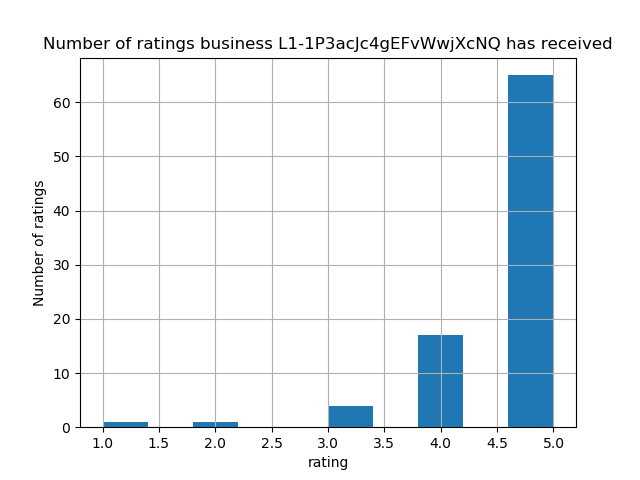

In [100]:
import matplotlib.pyplot as plt
%matplotlib notebook

df_new.loc[df_new['business_id'] == 'L1-1P3acJc4gEFvWwjXcNQ']['rating'].hist()
plt.xlabel('rating')
plt.ylabel('Number of ratings')
plt.title('Number of ratings business L1-1P3acJc4gEFvWwjXcNQ has received')
plt.show();